# Assignment : Lending Club Case Study

Author : Jyoti Panda

Date : 23 July 2024

# Business Understanding </b>
<br> This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. </b></br>

<br> Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. </b></br>

<br> When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:</b></br>
> 
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company> 

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the compy<br> 

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher intebe ></br>tof default.


# Business Objectives </b>
<br> To be able to identify risky loan applicants, so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. </b></br>

<br> We want to showcase the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. </b></br>

In [4]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None) #so that large dataframes can be seen in output wholely

In [5]:
#Importing Regular Expressions for String manipulation
import re

In [6]:
#Import the warnings.

import warnings
warnings.filterwarnings('ignore')

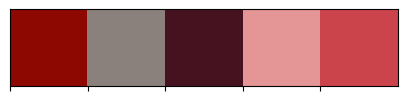

In [7]:
# Utils.
# from src.eda_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

## Segment1 - Loan dataset

In [9]:
#Read the input "loan dataset" into df dataframe
df = pd.read_csv("loan.csv")

In [10]:
#Display the first 5 records
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
#checking rows and column numbers/shape of the dataframe

df.shape

(39717, 111)

In [12]:
##checking info & datatypes of input variables
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

## Data Cleaning
### Treating null values

In [14]:
#checking for percentage of missing values in each column
df.isnull().sum()/len(df)*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [15]:
#checking for coloums having greater than 50% null value

null_cols=df.isnull().sum()/len(df)*100
null_cols=null_cols[null_cols.values>50.0]
print(null_cols)
len(null_cols)

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

57

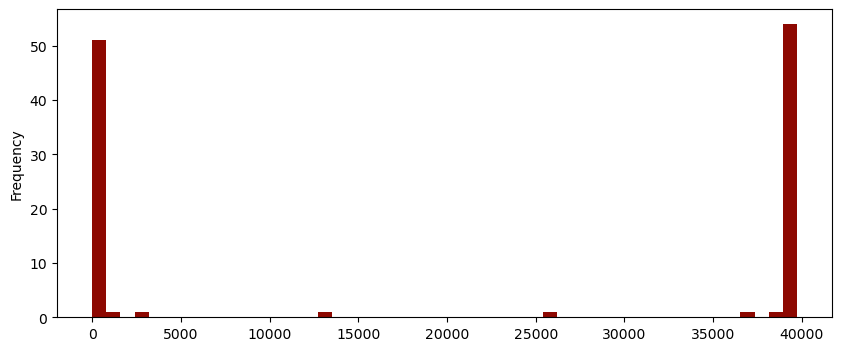

In [16]:
#as we see some columns have missing values and unique values, let see explore more to keep or drop them
#Let us do some cleanup of NULLs from rows and columns of the loan dataframe
c = df.isnull().sum()
c.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

In the above figure, X-axis contains number of NULL values and Y-axis contains number of columns. We can clearly see that there is a huge spike towards the 40K mark. The total records in our data is 39,717. We would obviously not need the columns that have all NULLs. Also, we see there are few columns above 10K mark, but let us analyze those before dropping.

In [18]:
c.loc[(c.values > 10000)].sort_values()

desc                              12942
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_rev_accts                     39717
mo_sin_rcnt_rev_tl_op             39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717
num_tl_op_past_12m                39717
pct_tl_nvr_dlq                    39717


In [19]:
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

Let us drop all columns having above 10K NULL values in them.We could have also done the same while checking for columns having greater than 50% null value

In [21]:
df.drop(columns=list(c[c.values > 10000].index), inplace=True)
df.shape

(39717, 53)

In [22]:
#Once we drop the missing data
r = df.isnull().sum(axis=1) / len(df.columns)
max(r.values)

0.09433962264150944

Checing for columns with unique or single values in them. we can look at those columns with single value and drop them as they are of no use for our analysis


In [24]:
unique_cols = df.nunique()
print(unique_cols)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

drop the columns above with value as "1"

In [26]:
c1 = unique_cols[unique_cols.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], dtype='object')

In [27]:
df.drop(columns = list(c1.index), inplace=True)
df.shape

(39717, 44)

We started with 111 columns and we have came down to 44 columns so far. 
The company wants to know which loan applications are risky. Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective. Secondly, fields like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively. Therefore, we will be droping all these columns mentioned below.

In [29]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=del_cols, inplace=True)
df.shape

(39717, 28)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   funded_amnt           int64  
 2   funded_amnt_inv       float64
 3   term                  object 
 4   int_rate              object 
 5   installment           float64
 6   grade                 object 
 7   sub_grade             object 
 8   emp_title             object 
 9   emp_length            object 
 10  home_ownership        object 
 11  annual_inc            float64
 12  verification_status   object 
 13  issue_d               object 
 14  loan_status           object 
 15  purpose               object 
 16  title                 object 
 17  addr_state            object 
 18  dti                   float64
 19  delinq_2yrs           int64  
 20  earliest_cr_line      object 
 21  inq_last_6mths        int64  
 22  open_acc              int64  
 23  pub_rec    

In [31]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


### Data preparation 

In [33]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'], dtype='object')

In [34]:
#Beginning with loan status columns
# Observing the whole data loan_status distribution to compare with missing values distributions of this target variable.

df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: proportion, dtype: float64

loan status "Current" doesn't help our analysis for approving or rejecting application, so we could drop this data

In [36]:
df = df[~(df['loan_status'] == 'Current')]
df.shape

(38577, 28)

Let us look at other columns for our analysis and concur how it can influence our decision making.

In [38]:
df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [39]:
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [40]:
#Let's remvoe percentile %
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

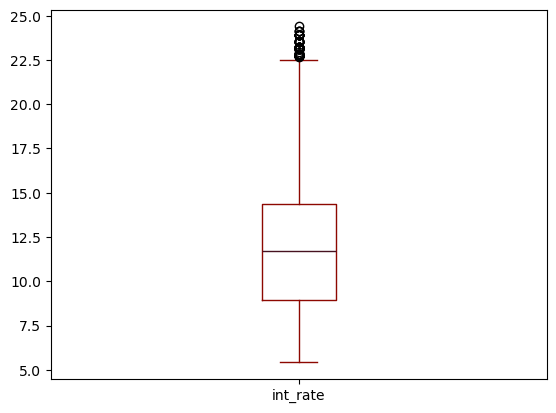

In [41]:
df['int_rate'].plot.box()

we see some outlier values in 'int_rate' column which needs to analysed during univariate analysis

In [43]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [44]:
df['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [45]:
print(df['emp_title'].value_counts().head())
print(df['emp_title'].unique().shape)

emp_title
US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: count, dtype: int64
(28028,)


In [46]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [47]:
df['emp_length'].isnull().sum()

1033

In [48]:
# Data Cleaning and Manipulation

# Extracting digits from Employee's length column i.e. Employee's Tenure.This variable will add value in our analysis

# Firstly filling null values with 0

# Print first 5 values from loan dataframe after this data manipulation

df.emp_length.fillna('0',inplace=True)
df['emp_length']= df.emp_length.str.extract('(\d+)')
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [49]:
df['emp_length'].isnull().sum()

0

In [50]:
df['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [51]:
df['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [52]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Splitting yeat into Month and year

In [54]:
## Extracting month and year
df_month_year = df['issue_d'].str.partition("-", True)     
df['issue_m']=df_month_year[0]                       
df['issue_y']='20' + df_month_year[2]
df['issue_y'] = pd.to_numeric(df['issue_y'])

In [55]:
df['issue_m'].value_counts()

issue_m
Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: count, dtype: int64

In [56]:
df['issue_y'].value_counts()

issue_y
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

In [57]:
df.drop(columns=['issue_d'], inplace=True)

In [58]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_m,issue_y
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,Dec,2011


In [59]:
df['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [60]:
len(df['title'].value_counts())

19297

In [61]:
df['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [62]:
df['title'].sample(10)

29702                   Credit Card Consolidation
20246                          School Loan Payoff
11657                        Bye Bye Credit Cards
8306     Start-up Money for Established Franchise
13330                     Debt Consolidation Loan
28298             Commercial Building DownPayment
7867                          Major Purchase Loan
34677                Consolidate Credit Card Debt
21687                       Credit Card debt loan
17263                                   Debt Loan
Name: title, dtype: object

The 'title' column seems to have two many unique values for our benefit, we would be dropping it.

In [64]:
df.drop(columns=['title'], inplace=True)

In [65]:
df['addr_state'].value_counts()

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [66]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
Nov-99    315
Nov-00    312
Sep-00    299
Oct-98    295
Nov-97    293
Dec-95    287
Dec-99    284
Dec-00    277
Jan-00    276
Sep-01    265
Jul-00    264
Nov-96    263
Aug-00    262
Oct-01    261
Oct-02    259
Dec-96    259
Sep-99    255
May-00    250
Aug-98    250
Apr-00    245
Oct-97    243
Aug-99    242
Oct-03    240
Jan-99    239
Sep-98    237
Jan-01    236
Dec-94    230
Sep-02    229
Oct-04    228
Jan-96    226
Jan-97    225
Oct-96    224
Jul-99    218
Jan-94    214
Feb-00    214
Jun-00    213
Nov-03    212
Feb-99    211
Nov-95    210
Dec-01    210
Sep-03    208
Mar-00    207
May-99    207
Sep-04    203
Aug-01    202
Aug-97    200
Dec-93    199
Mar-99    198
May-01    197
Nov-01    196
May-98    195
Jun-99    194
Nov-94    194
Jun-98    194
Feb-01    194
Mar-98    194
Jul-98    193
Jan-95    192
Jan-98    188
Jun-01    183
Jul-01    177
Apr-98    175
Aug-95    175
May-96    175
Sep-97    175
Apr

In the 'earliest_cr_line' column, we do see the year is a 2 digit and not Y2K corrected. Therefre, we would need to apply some logic to extract meaningful data from here

In [68]:
## Extracting month and year
# df_month_year = df['earliest_cr_line'].str.partition("-", True)     
# df['earliest_cr_line_m']=df_month_year[0]                       
# df['earliest_cr_line_y']=df_month_year[2]

# Convert earlist_cr_line to datetime format.
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
5   2004-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [69]:
from datetime import datetime
today = datetime.today()
today.date()

datetime.date(2024, 7, 23)

In [70]:
import numpy as np #version: 1.16.2
import pandas as pd #version: 0.25.1

# Extract new features
CURR_DATE = pd.to_datetime(today.date())

# Extract days_since_earliest_cr_line variable.
# df['mths_since_earliest_cr_line'] = round((CURR_DATE - df['earliest_cr_line'])/ np.timedelta64(1, 'M'))
df['mths_since_earliest_cr_line'] = round((CURR_DATE - df['earliest_cr_line']).dt.days / 30.4375 )


In [71]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
1999-11-01    315
2000-11-01    312
2000-09-01    299
1998-10-01    295
1997-11-01    293
1995-12-01    287
1999-12-01    284
2000-12-01    277
2000-01-01    276
2001-09-01    265
2000-07-01    264
1996-11-01    263
2000-08-01    262
2001-10-01    261
2002-10-01    259
1996-12-01    259
1999-09-01    255
2000-05-01    250
1998-08-01    250
2000-04-01    245
1997-10-01    243
1999-08-01    242
2003-10-01    240
1999-01-01    239
1998-09-01    237
2001-01-01    236
1994-12-01    230
2002-09-01    229
2004-10-01    228
1996-01-01    226
1997-01-01    225
1996-10-01    224
1999-07-01    218
1994-01-01    214
2000-02-01    214
2000-06-01    213
2003-11-01    212
1999-02-01    211
1995-11-01    210
2001-12-01    210
2003-09-01    208
2000-03-01    207
1999-05-01    207
2004-09-01    203
2001-08-01    202
1997-08-01    200
1993-12-01    199
1999-03-01    198
2001-05-01    197
2001-11-01 

In [72]:
df['mths_since_earliest_cr_line'].value_counts()

mths_since_earliest_cr_line
 298.0    360
 309.0    357
 286.0    341
 308.0    340
 320.0    318
 297.0    315
 285.0    312
 287.0    299
 310.0    295
 321.0    293
 344.0    287
 296.0    284
 284.0    277
 295.0    276
 275.0    265
 289.0    264
 333.0    263
 288.0    262
 274.0    261
 262.0    259
 332.0    259
 299.0    255
 291.0    250
 312.0    250
 292.0    245
 322.0    243
 300.0    242
 250.0    240
 307.0    239
 311.0    237
 283.0    236
 356.0    230
 263.0    229
 238.0    228
 343.0    226
 331.0    225
 334.0    224
 301.0    218
 367.0    214
 294.0    214
 290.0    213
 249.0    212
 306.0    211
 345.0    210
 272.0    210
 251.0    208
 293.0    207
 303.0    207
 239.0    203
 276.0    202
 324.0    200
 368.0    199
 305.0    198
 279.0    197
 273.0    196
 315.0    195
 302.0    194
 357.0    194
 314.0    194
 282.0    194
 317.0    194
 313.0    193
 355.0    192
 319.0    188
 278.0    183
 277.0    177
 316.0    175
 348.0    175
 339.0    175
 323.0

In [73]:
df['mths_since_earliest_cr_line'].describe()

count    38577.000000
mean       327.204137
std         88.615571
min       -532.000000
25%        274.000000
50%        314.000000
75%        368.000000
max        666.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int64         
 1   funded_amnt                  int64         
 2   funded_amnt_inv              float64       
 3   term                         object        
 4   int_rate                     float64       
 5   installment                  float64       
 6   grade                        object        
 7   sub_grade                    object        
 8   emp_title                    object        
 9   emp_length                   object        
 10  home_ownership               object        
 11  annual_inc                   float64       
 12  verification_status          object        
 13  loan_status                  object        
 14  purpose                      object        
 15  addr_state                   object        
 16  dti      

In [75]:
# Obtain a sample to observe inconsistent values.
df.loc[df['mths_since_earliest_cr_line'] < 0, ['mths_since_earliest_cr_line', 'earliest_cr_line']].sample(10)

,mths_since_earliest_cr_line,earliest_cr_line
37442,-517.0,2067-09-01
14234,-461.0,2063-01-01
24701,-457.0,2062-09-01
25117,-496.0,2065-12-01
11303,-457.0,2062-09-01
33994,-476.0,2064-04-01
1764,-529.0,2068-09-01
13450,-476.0,2064-04-01
4435,-529.0,2068-09-01
19838,-512.0,2067-04-01


### It is possible to see that the negative time delta records occur because when converting earliest_cr_line to datetime format, the function interpreted lower than 70's dates as 20's dates and not 90's dates. To handle this, we will impute these negative dates with the maximum timedelta in mths_since_earliest_cr_line, in order to preserve the same information - "A lot of months since earliest credit line".

In [77]:
max_mths_since_earliest_cr_line = df['mths_since_earliest_cr_line'].max()
df.loc[df['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = max_mths_since_earliest_cr_line
df['mths_since_earliest_cr_line'].describe().T

count    38577.000000
mean       329.749073
std         81.402191
min        189.000000
25%        275.000000
50%        315.000000
75%        368.000000
max        666.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [78]:
df.drop(columns=['earliest_cr_line'], inplace=True)

In [79]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [80]:
#let us convert these values in numerics by removing %
df['revol_util'] = pd.Series(df['revol_util']).str.replace('%', '').astype(float)
df['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loan_amnt                    int64  
 1   funded_amnt                  int64  
 2   funded_amnt_inv              float64
 3   term                         object 
 4   int_rate                     float64
 5   installment                  float64
 6   grade                        object 
 7   sub_grade                    object 
 8   emp_title                    object 
 9   emp_length                   object 
 10  home_ownership               object 
 11  annual_inc                   float64
 12  verification_status          object 
 13  loan_status                  object 
 14  purpose                      object 
 15  addr_state                   object 
 16  dti                          float64
 17  delinq_2yrs                  int64  
 18  inq_last_6mths               int64  
 19  open_acc 

In [82]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,mths_since_earliest_cr_line
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,37880.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.702777,22.052648,0.043479,2010.309070,329.749073
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.364741,11.425861,0.204583,0.882658,81.402191
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,189.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,0.000000,2010.000000,275.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,0.000000,2011.000000,315.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.300000,29.000000,0.000000,2011.000000,368.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,2011.000000,666.000000


In [83]:
loan_status_percent = df['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

# We have now cleaned our data set and have parameters for EDA. let's proceed with EDA


Univariate Analysis

Let us start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)t

In [85]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones

df['loan_status_num'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [86]:
#Finding out percentages of various purpose of loans out of total loans issued

(df.purpose.value_counts()*100)/len(df)

purpose
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: count, dtype: float64

In [87]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_m,issue_y,mths_since_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.7,9,0.0,Dec,2011,475.0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.4,4,0.0,Dec,2011,304.0,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.5,10,0.0,Dec,2011,273.0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21.0,37,0.0,Dec,2011,342.0,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.3,12,0.0,Dec,2011,237.0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loan_amnt                    int64  
 1   funded_amnt                  int64  
 2   funded_amnt_inv              float64
 3   term                         object 
 4   int_rate                     float64
 5   installment                  float64
 6   grade                        object 
 7   sub_grade                    object 
 8   emp_title                    object 
 9   emp_length                   object 
 10  home_ownership               object 
 11  annual_inc                   float64
 12  verification_status          object 
 13  loan_status                  object 
 14  purpose                      object 
 15  addr_state                   object 
 16  dti                          float64
 17  delinq_2yrs                  int64  
 18  inq_last_6mths               int64  
 19  open_acc 

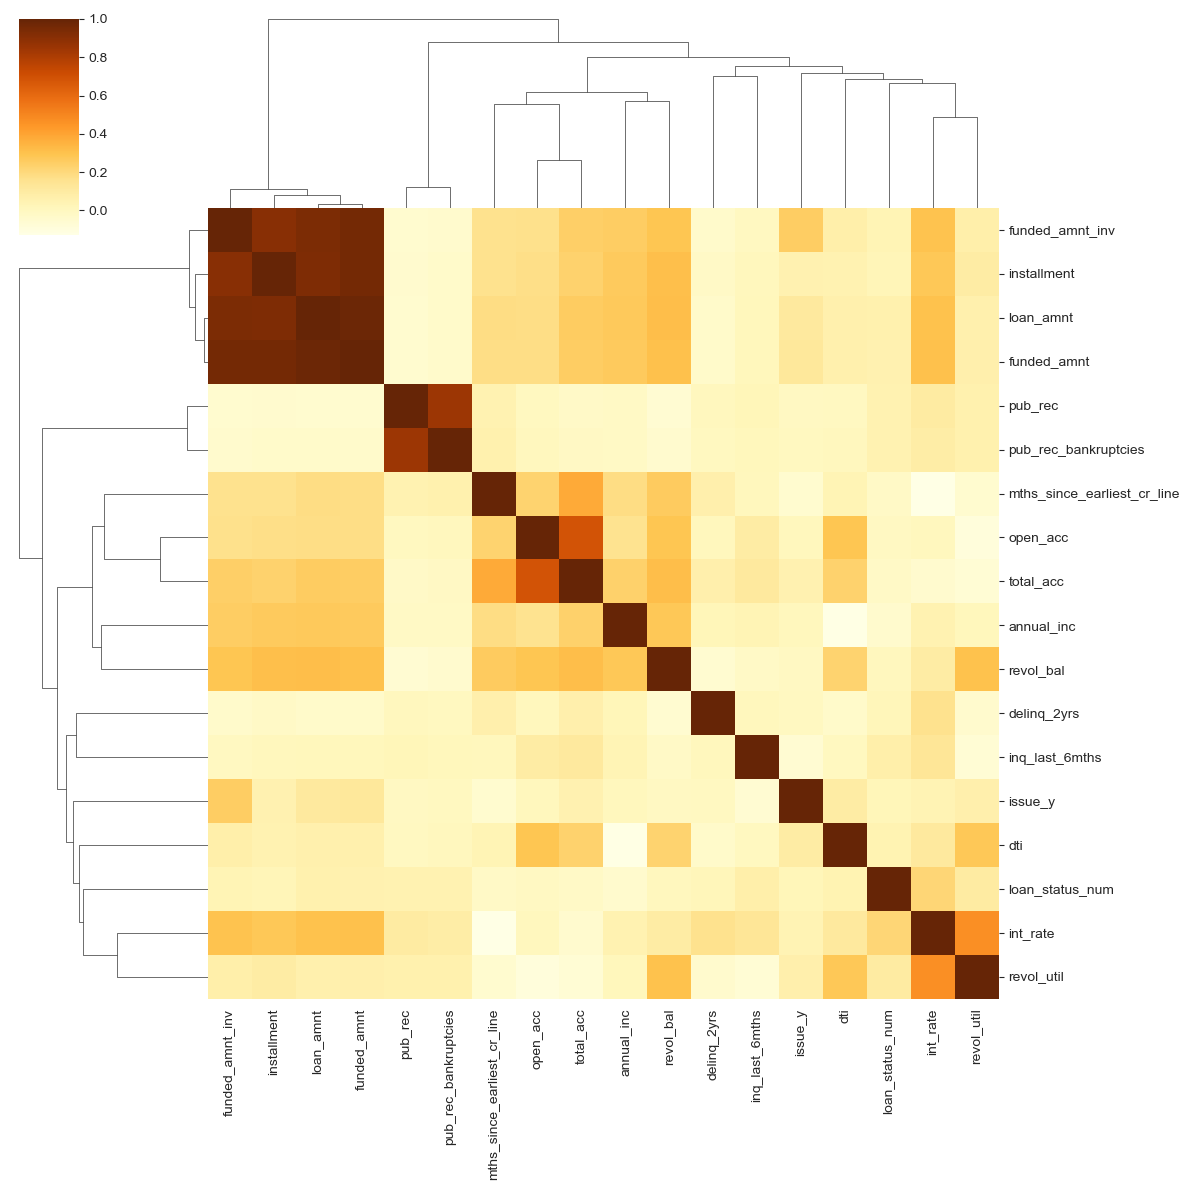

In [89]:
sns.set_style("whitegrid")
sns.clustermap(data=df.corr(numeric_only=True), cmap='YlOrBr', figsize=(12,12))
plt.show()

Since we know darker the value heigher the correlation , we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation.
These fields are proportional to each other. Next, the public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

In [91]:
#Checking for all available styles to use to select the style you prefer

import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>],
       [<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>],
       [<Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>],
       [<Axes: title={'center': 'issue_y'}>,
        <Axes: title={'center': 'mths_since_earliest_cr_line'}>,
        <Axes: title={'center': 'loan_status_num'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, 

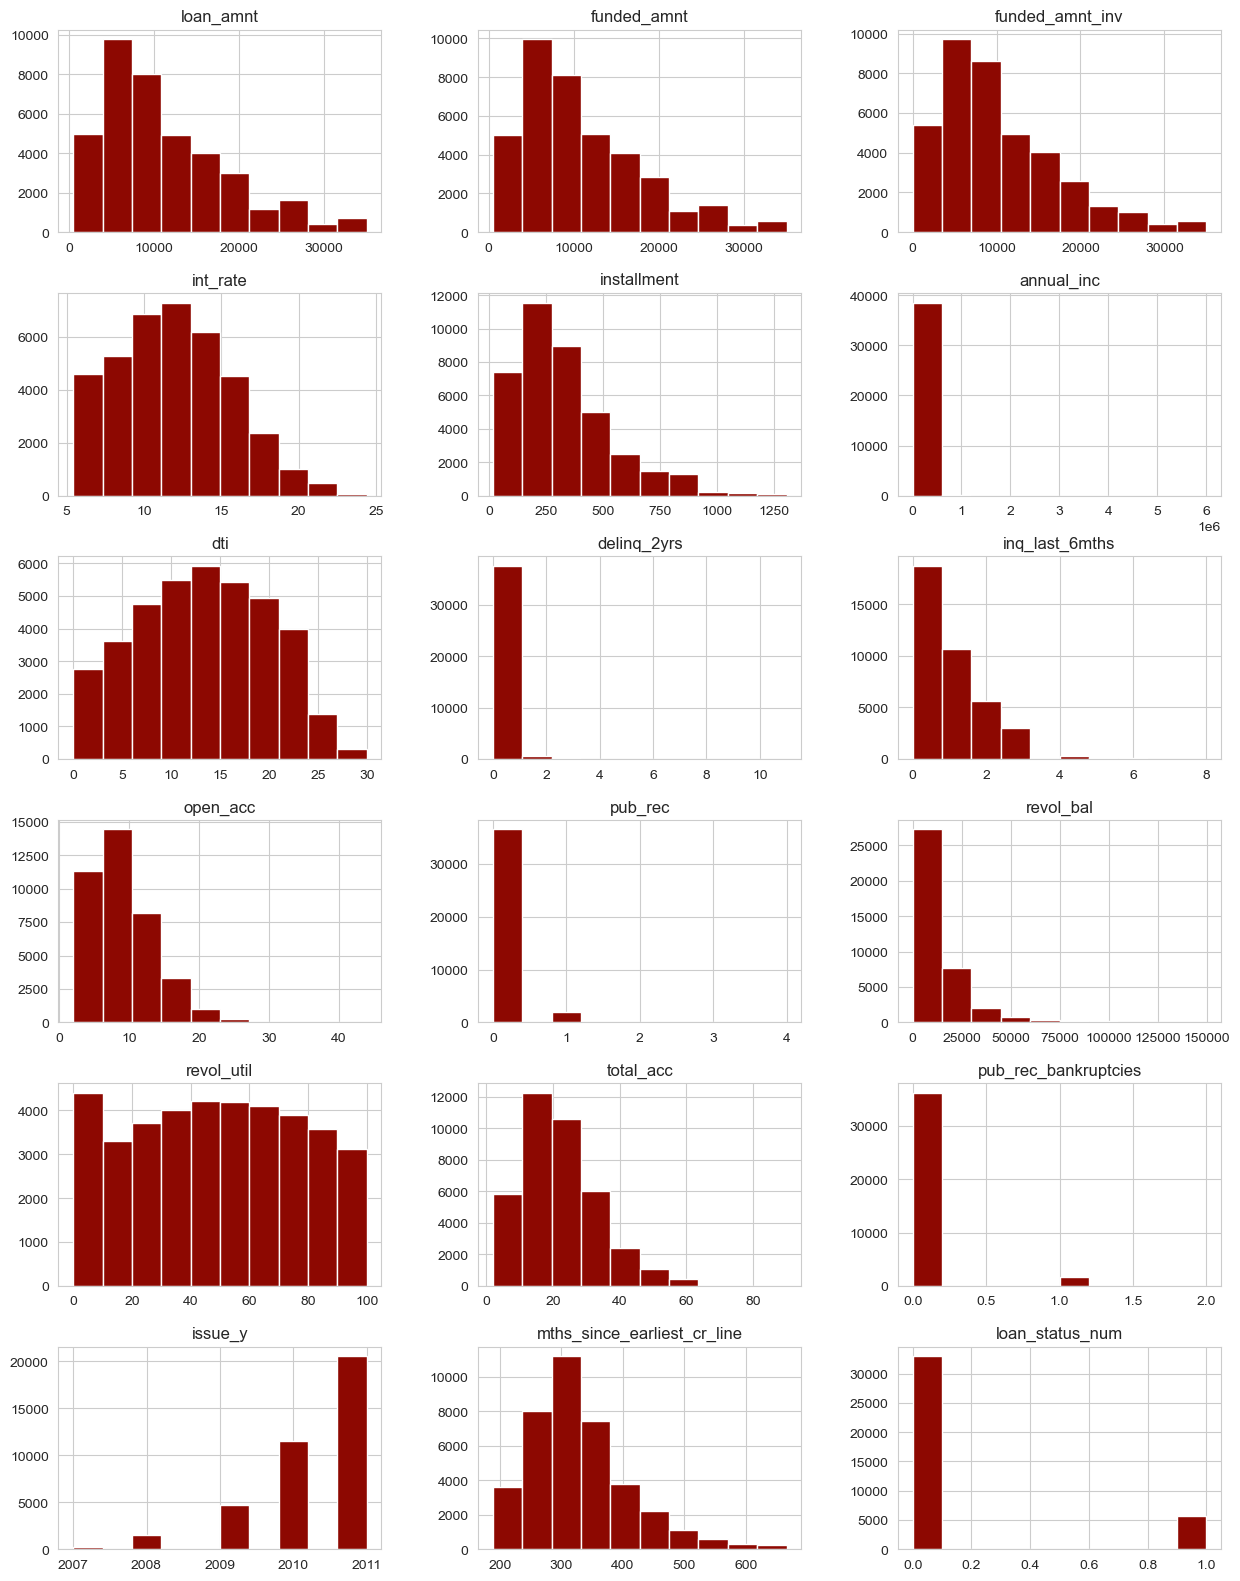

In [92]:
# All columns of a dataset
df.hist(figsize=(15,30),layout=(9,3))

# Loan status vs Numerical continuous variables


Let us now compare the loan_status fields with all the numerical variable. Since the analysis for this category will be similar, let us contruct a common function which can be used for all.



In [95]:
# here are some of the global settings/constants that will be referred to within the functions defined below
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

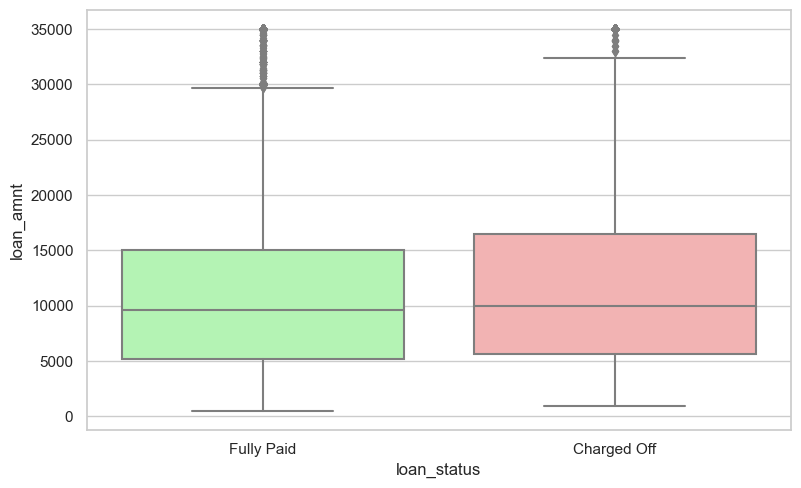

In [96]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

In [97]:
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

since we see there is huge difference between mean and median . let us limit our data to 75%


In [99]:
loan_till75 = df.loc[(df['loan_amnt']<=15000)]

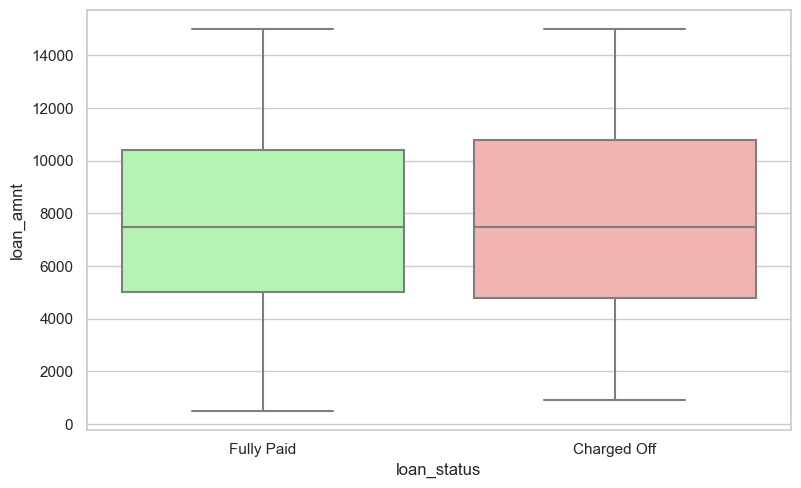

In [100]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

since it is giving a clean picture without any further outliers, let us take data above 75%.



In [102]:
loan_above75 = df.loc[(df['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_m,issue_y,mths_since_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,Archdiocese of Galveston Houston,3,RENT,43370.0,Verified,Fully Paid,debt_consolidation,TX,26.53,0,3,8,0,17813,85.6,22,0.0,Dec,2011,321.0,0
21,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,Osram Sylvania,10,RENT,105000.0,Verified,Charged Off,debt_consolidation,FL,13.22,0,0,7,0,32135,90.3,38,0.0,Dec,2011,498.0,1
25,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,Winfield Pathology Consultants,2,MORTGAGE,92000.0,Verified,Fully Paid,credit_card,IL,29.44,0,0,8,0,13707,93.9,31,0.0,Dec,2011,270.0,0
26,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,nyc transit,9,RENT,60000.0,Not Verified,Charged Off,debt_consolidation,NY,15.22,0,1,7,0,5872,57.6,11,0.0,Dec,2011,250.0,1
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5,MORTGAGE,75000.0,Verified,Fully Paid,debt_consolidation,NJ,14.03,0,0,12,0,23151,27.4,26,0.0,Dec,2011,513.0,0


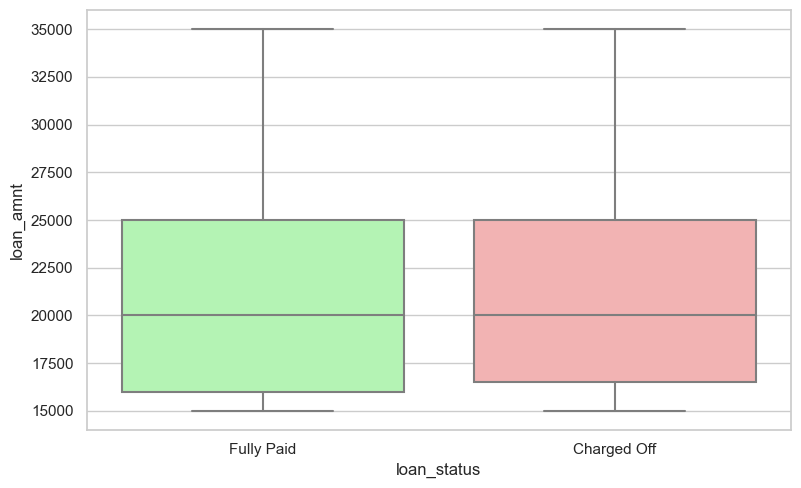

In [103]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

from above box plot we can conclude that "heigher the amount" will tend to be loan "Write off"


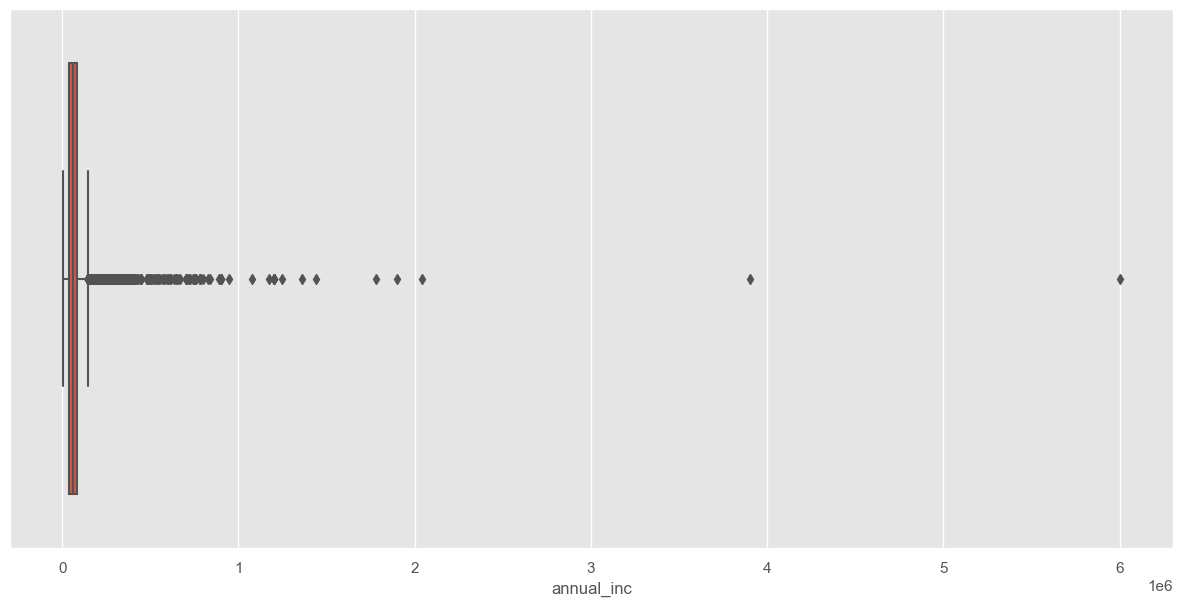

In [105]:
# Drawing Boxplot for Annual Income to analyse further
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(x = df.annual_inc)

In [106]:
quant_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

###### Observations -
There are outliers, that we need to remove. So, we will be taking a threshold of 95 percentile

In [108]:
# Basic Statistics with Quantitative Variables

print('Before removing Outliers from Annual Income :\n')
print(df['annual_inc'].describe(),'\n')

# Removing Outliers i.e. Quantile 0.95 from Annual Income attribute

df = df[df["annual_inc"]< df["annual_inc"].quantile(0.95)]

print('After removing outliers from annual Income:\n')
print(df["annual_inc"].describe())

Before removing Outliers from Annual Income :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

After removing outliers from annual Income:

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64


In [109]:
quant_info = df["annual_inc"].quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     56000.00
0.75     77704.05
0.90    100000.00
0.95    117000.00
0.99    135000.00
Name: annual_inc, dtype: float64

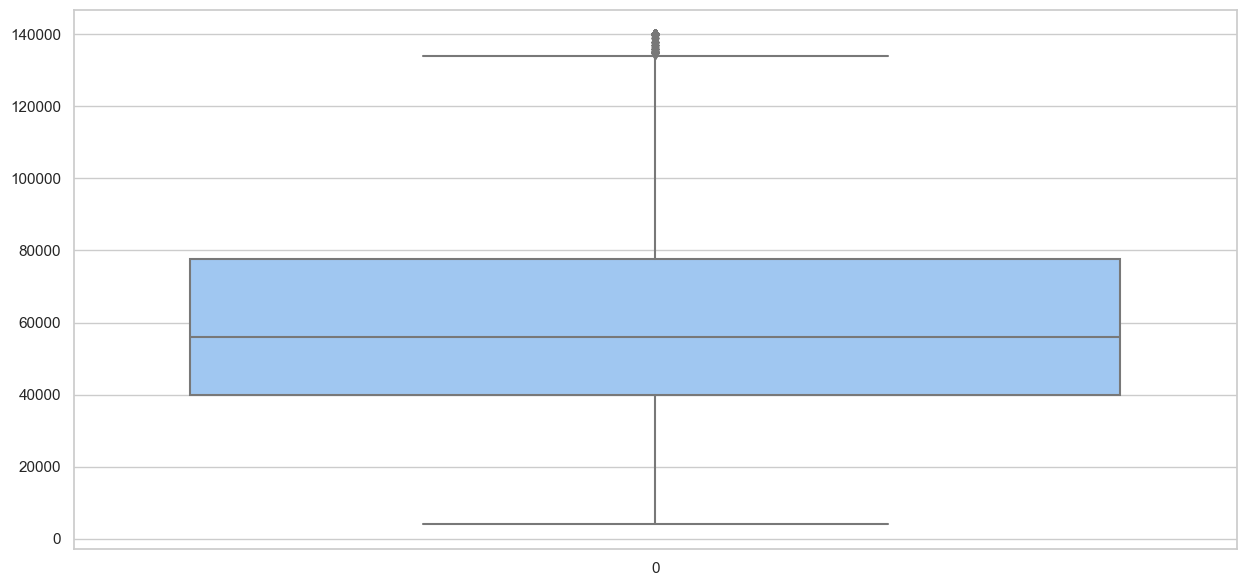

In [110]:
# Drawing Boxplot for Annual Income, showcasing the outliers that are above 95 percentile have been removed.
plt.figure(figsize=(15,7))
with plt.style.context('seaborn-v0_8-pastel'):
    sns.boxplot(df.annual_inc)

since we have too many columns for univariate analysis let us define some default functions, so that we can re-use same function
for all the columns

In [112]:
def PercentileCut (*, data=df, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'df'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [113]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_m', 'issue_y', 'mths_since_earliest_cr_line', 'loan_status_num'], dtype='object')

In [114]:
from scipy import stats
from IPython.core.display import HTML

def Univariate_Categorical (*, data=df, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df1 = df.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df1 = df1.loc[df1[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = df.groupby([column])[by].count()
        df1 = df1.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df1.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

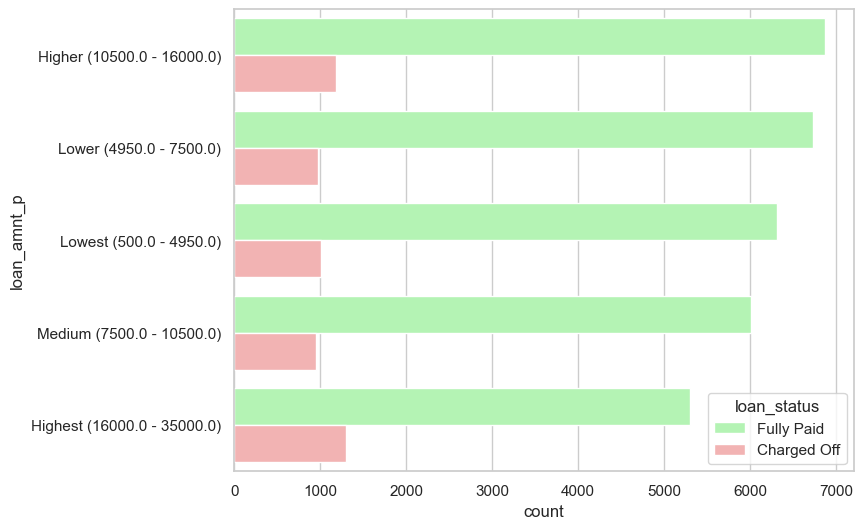

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.196453,6597
Higher (10500.0 - 16000.0),0.146638,8047
Lowest (500.0 - 4950.0),0.138336,7330
Medium (7500.0 - 10500.0),0.137030,6962
Lower (4950.0 - 7500.0),0.126135,7706


In [115]:
PercentileCut(column = 'loan_amnt')
Univariate_Categorical(column = 'loan_amnt_p')

Higher the loan amount, greater the chance of the loan getting default.

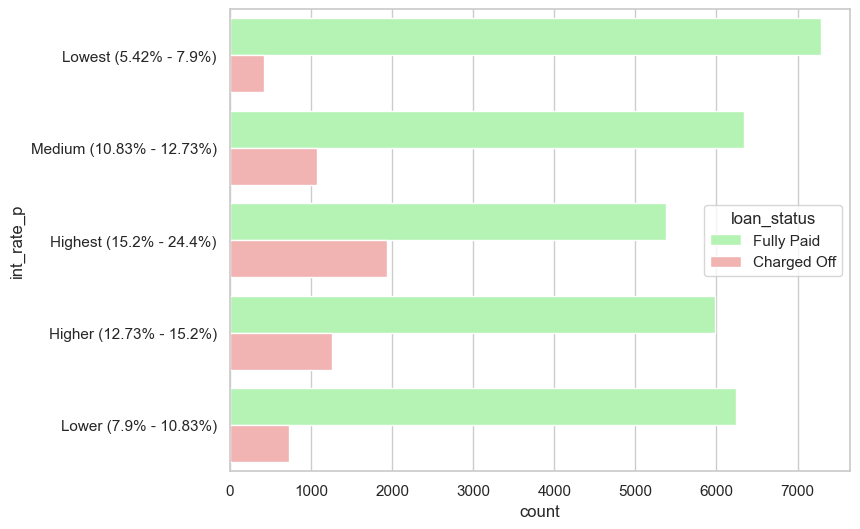

int_rate_p,Charged off %,Record count
Highest (15.2% - 24.4%),0.265092,7322
Higher (12.73% - 15.2%),0.173529,7238
Medium (10.83% - 12.73%),0.144591,7414
Lower (7.9% - 10.83%),0.103993,6962
Lowest (5.42% - 7.9%),0.054892,7706


In [117]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

Similarly , Higher the interest rate leads to higher 'Charged off %'

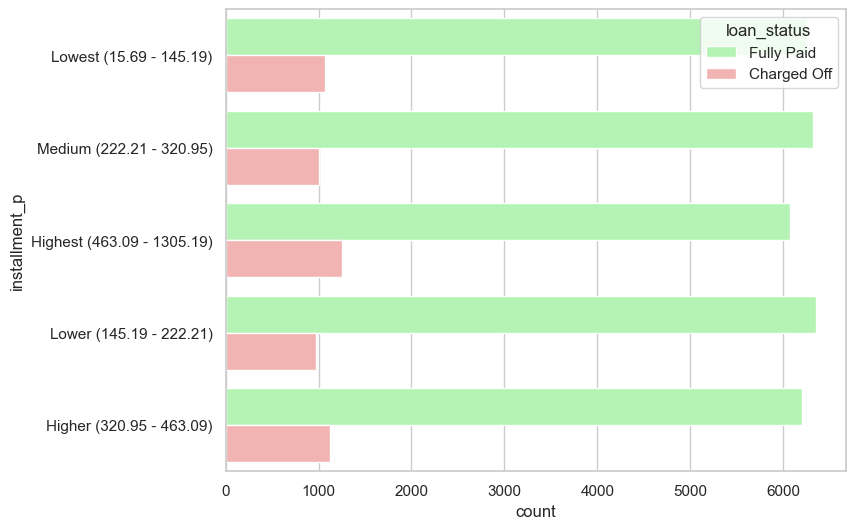

installment_p,Charged off %,Record count
Highest (463.09 - 1305.19),0.170965,7329
Higher (320.95 - 463.09),0.152744,7326
Lowest (15.69 - 145.19),0.146092,7331
Medium (222.21 - 320.95),0.136717,7329
Lower (145.19 - 222.21),0.132524,7327


In [119]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

Above data and plot shows that higher installment amounts shows slightly higher default percentages.



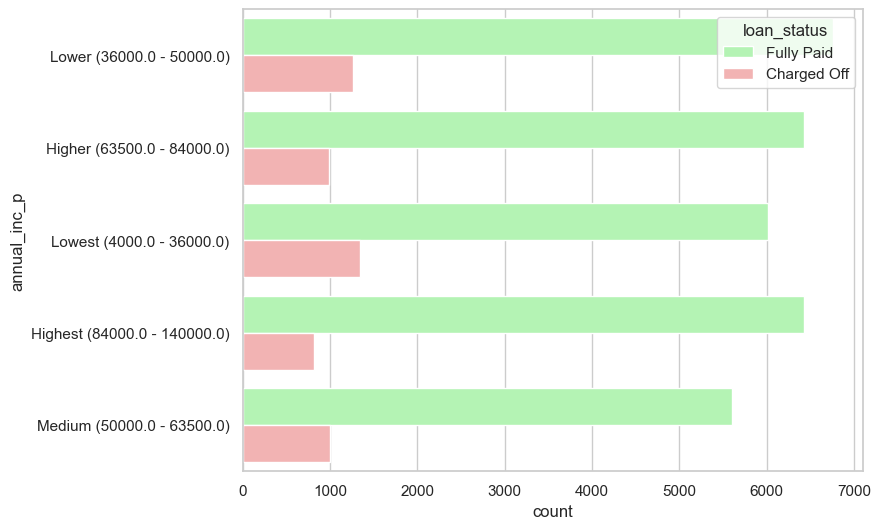

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 36000.0),0.182967,7362
Lower (36000.0 - 50000.0),0.157718,8027
Medium (50000.0 - 63500.0),0.151515,6600
Higher (63500.0 - 84000.0),0.132946,7409
Highest (84000.0 - 140000.0),0.112921,7244


In [121]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

Higher the income higher the repayment %, lower income gets more charged off %


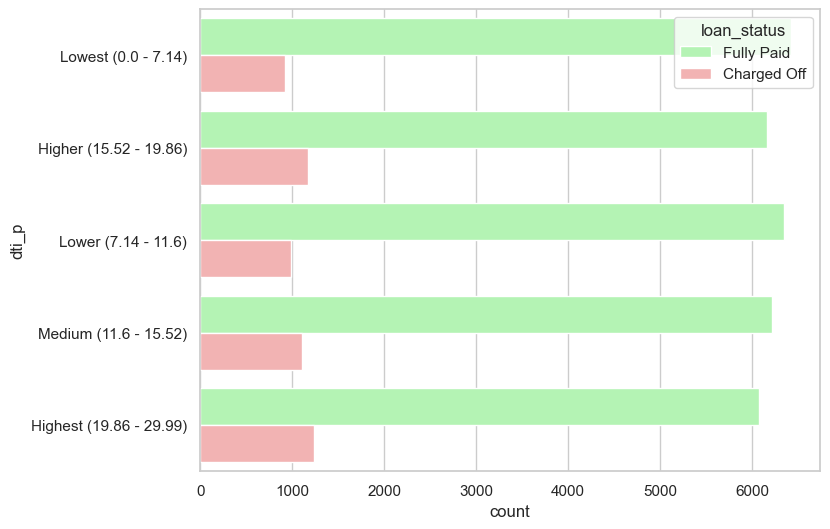

dti_p,Charged off %,Record count
Highest (19.86 - 29.99),0.168854,7314
Higher (15.52 - 19.86),0.159667,7334
Medium (11.6 - 15.52),0.150505,7322
Lower (7.14 - 11.6),0.134497,7331
Lowest (0.0 - 7.14),0.125596,7341


In [123]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

higher DTI ( debt to income ratio) will lead to higher charged off %


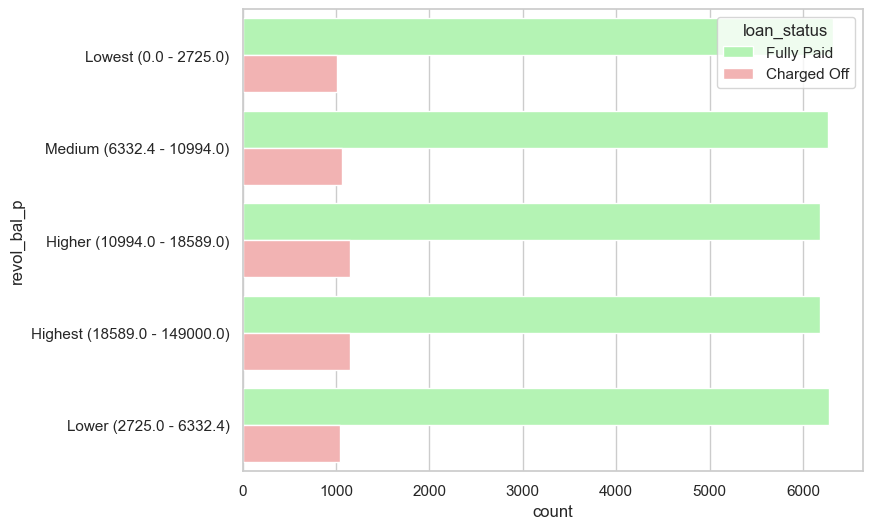

revol_bal_p,Charged off %,Record count
Highest (18589.0 - 149000.0),0.156659,7328
Higher (10994.0 - 18589.0),0.156250,7328
Medium (6332.4 - 10994.0),0.145313,7329
Lower (2725.0 - 6332.4),0.142467,7321
Lowest (0.0 - 2725.0),0.138359,7336


In [125]:
PercentileCut(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')

This shows the total credit revolving balances slightly influence the default percentage. Higher the revolving balance, bigger the chance of the loan getting defaulted.

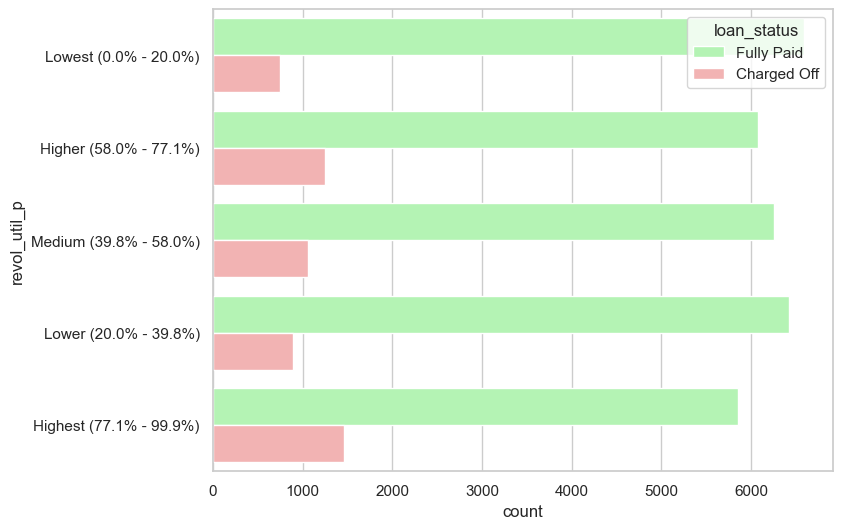

revol_util_p,Charged off %,Record count
Highest (77.1% - 99.9%),0.199206,7304
Higher (58.0% - 77.1%),0.170329,7327
Medium (39.8% - 58.0%),0.145122,7318
Lower (20.0% - 39.8%),0.121771,7317
Lowest (0.0% - 20.0%),0.101528,7328


In [127]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

This data shows that the revolving line utilization rate has a large impact to the default percentage. When this increases, the charged off percentage rises.


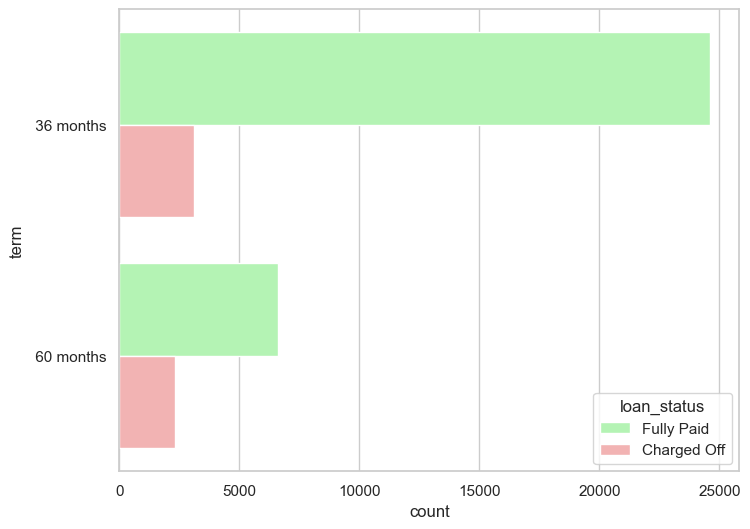

term,Charged off %,Record count
60 months,0.257953,8928
36 months,0.112326,27714


In [129]:
Univariate_Categorical(column='term')

For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases.
Therefore, loan repayment term plays a factor in judging the default rate lower loan terms default less..

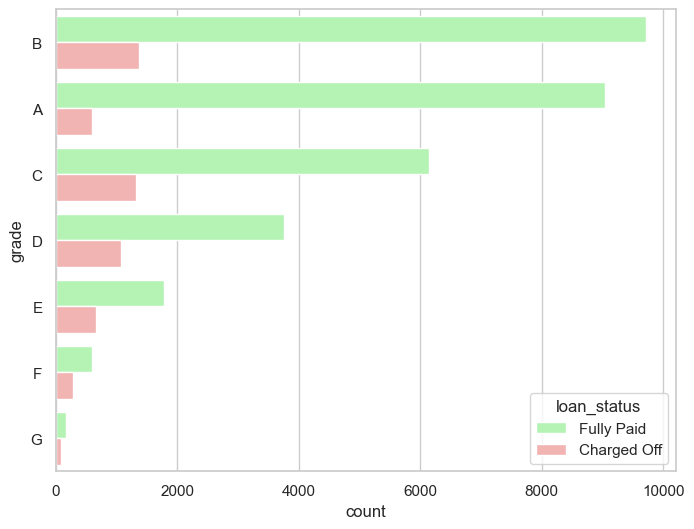

grade,Charged off %,Record count
G,0.363985,261
F,0.326185,886
E,0.269530,2445
D,0.223417,4834
C,0.177076,7477
B,0.124009,11096
A,0.061495,9643


In [131]:
Univariate_Categorical(column='grade')

We can clearly see that loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others.


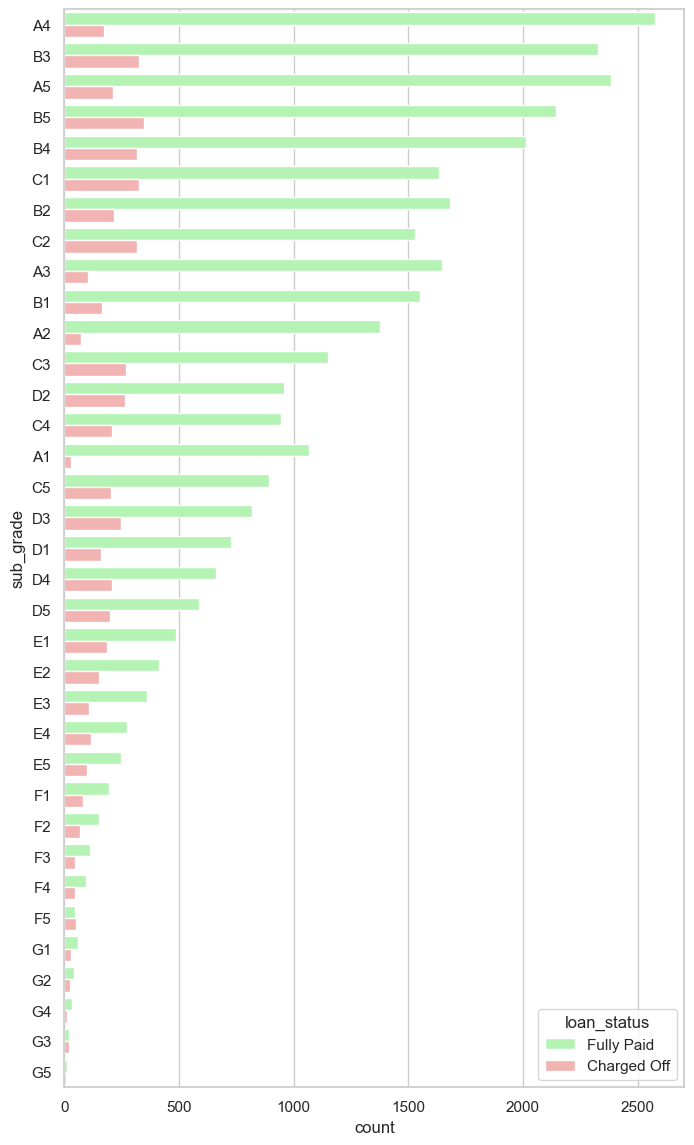

sub_grade,Charged off %,Record count
F5,0.510204,98
G3,0.475000,40
G5,0.409091,22
G2,0.393939,66
G1,0.340909,88
F4,0.330935,139
F2,0.308756,217
E4,0.298469,392
F3,0.294872,156
F1,0.289855,276


In [133]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

The above table shows the loan sub-grade versus the default percentage. The G3 and F5 sub categories have above 40% default rate, with F5 being more than 50% default. This field is a clear indicator of the default percent.


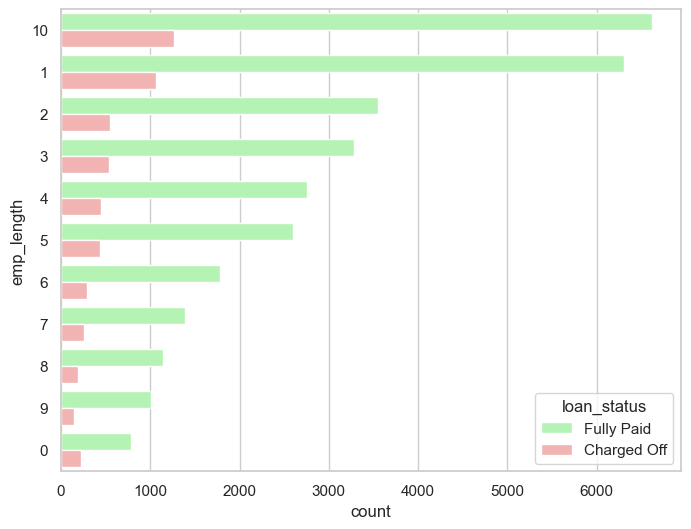

emp_length,Charged off %,Record count
0,0.221893,1014
10,0.160959,7884
7,0.153378,1643
5,0.144875,3044
8,0.144668,1341
1,0.144640,7370
6,0.141823,2073
3,0.140204,3823
4,0.138567,3197
2,0.133382,4101


In [135]:
Univariate_Categorical(column='emp_length')

although there is nothing much to conclude from above data, we can see having no employment will lead to Defaulted payment

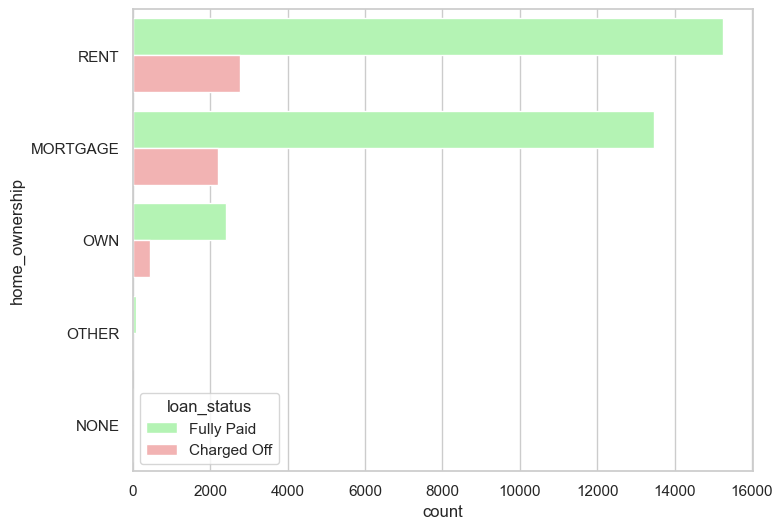

home_ownership,Charged off %,Record count
OTHER,0.184783,92
RENT,0.153808,18029
OWN,0.152174,2852
MORTGAGE,0.139921,15666


In [137]:
Univariate_Categorical(column='home_ownership')

we have not much info to conclude as it says "OTHER"


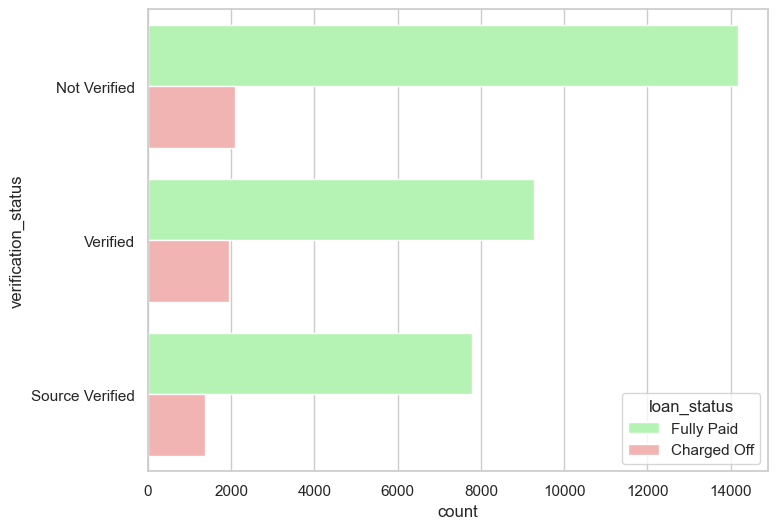

verification_status,Charged off %,Record count
Verified,0.173711,11214
Source Verified,0.150055,9150
Not Verified,0.128701,16278


In [139]:
Univariate_Categorical(column='verification_status')

interestingly verified applicants have more defaulted % which means the verifiaction process is not being done in a proper/correct manner.


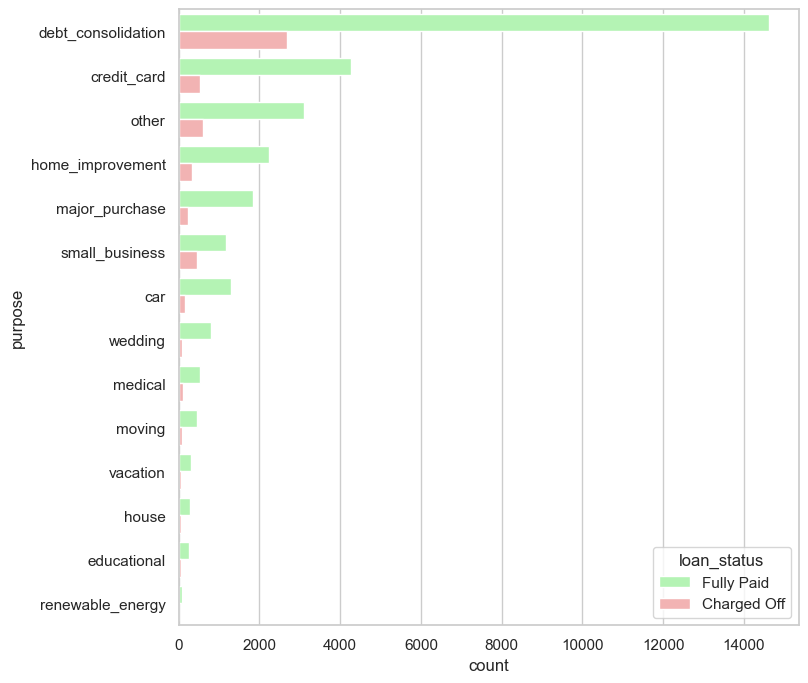

purpose,Charged off %,Record count
small_business,0.279729,1623
renewable_energy,0.189474,95
educational,0.173077,312
other,0.163690,3696
moving,0.163636,550
house,0.162722,338
medical,0.162500,640
debt_consolidation,0.154615,17301
vacation,0.142466,365
home_improvement,0.126027,2555


In [141]:
Univariate_Categorical(column='purpose', figsize=(8,8))

From the above analysis it is evident that the loans taken for small_business, renewable_energy and educational are the riskier ones.


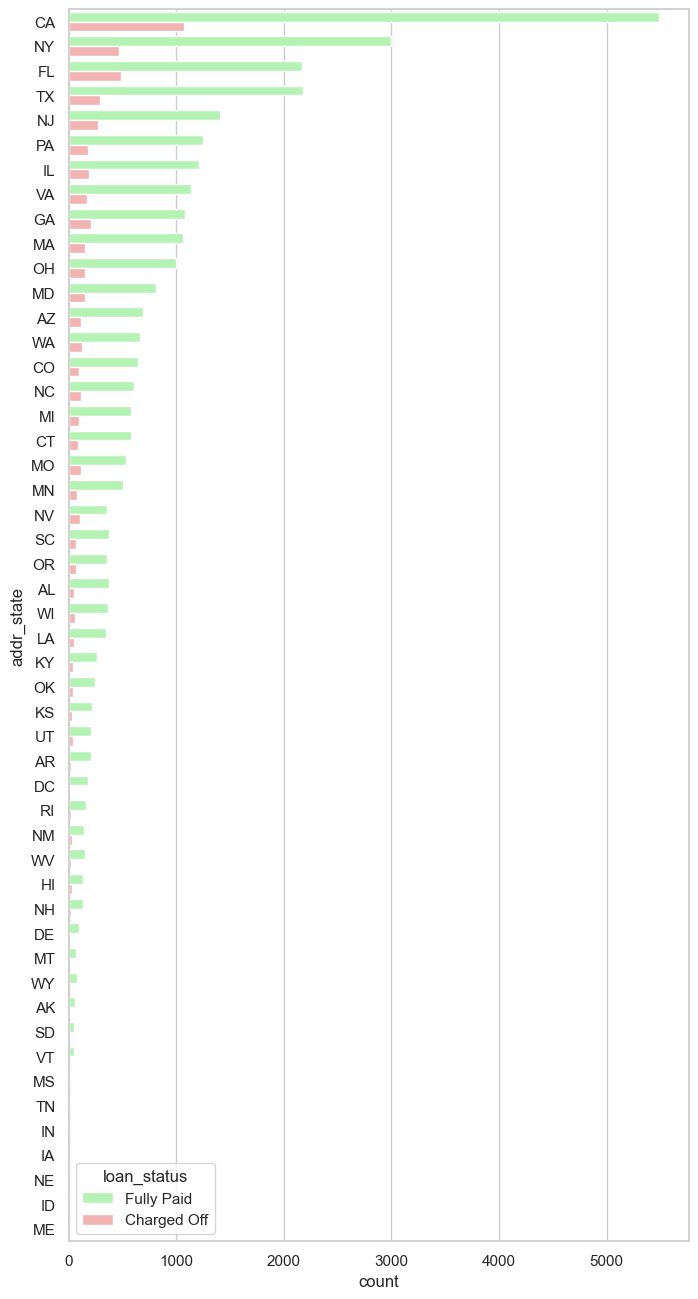

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.225383,457
ID,0.200000,5
SD,0.193548,62
AK,0.183099,71
FL,0.182881,2652
HI,0.175000,160
MO,0.171561,647
NM,0.169492,177
CA,0.163567,6560


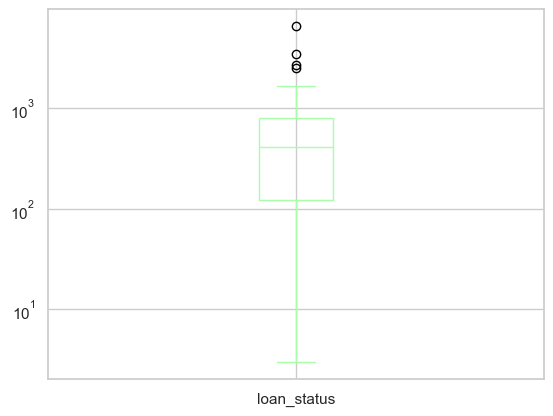

In [143]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

From the above table we can see that the some of the risky states are NE, NV , SD , AK , FL , MO


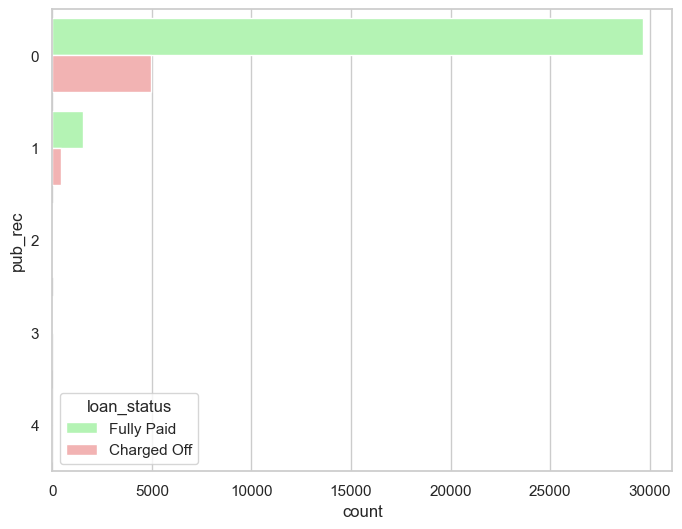

pub_rec,Charged off %,Record count
1,0.228499,1965
2,0.217391,46
0,0.143171,34623


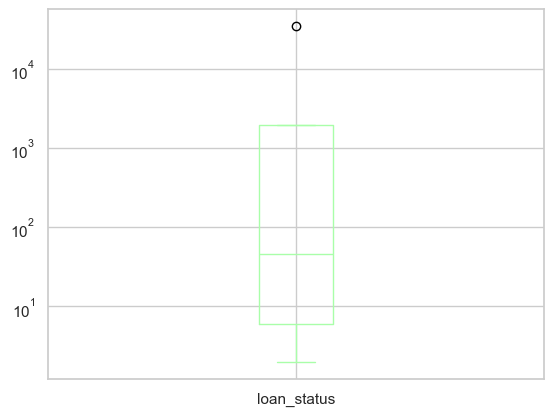

In [145]:
Univariate_Categorical(column='pub_rec', box_plot=True)

The data and graph clearly shows that individuals with non-zero derogatory public records have higher chances of charged off.



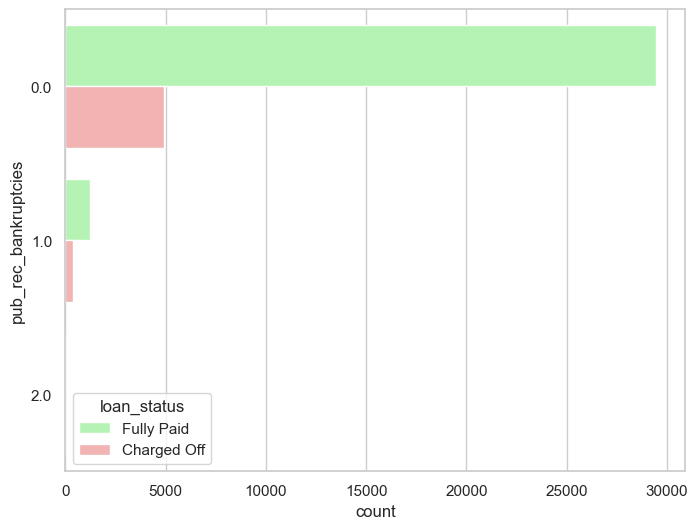

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.225766,1599
0.0,0.143717,34380


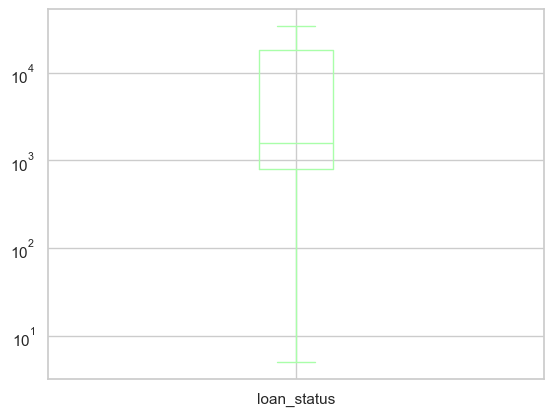

In [147]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.


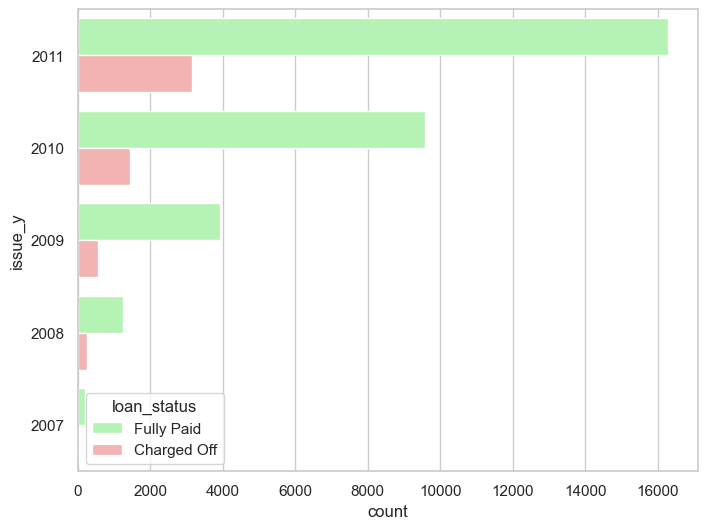

issue_y,Charged off %,Record count
2007,0.178261,230
2011,0.161617,19441
2008,0.159167,1489
2010,0.129826,11007
2009,0.126704,4475


In [149]:
Univariate_Categorical(column='issue_y')

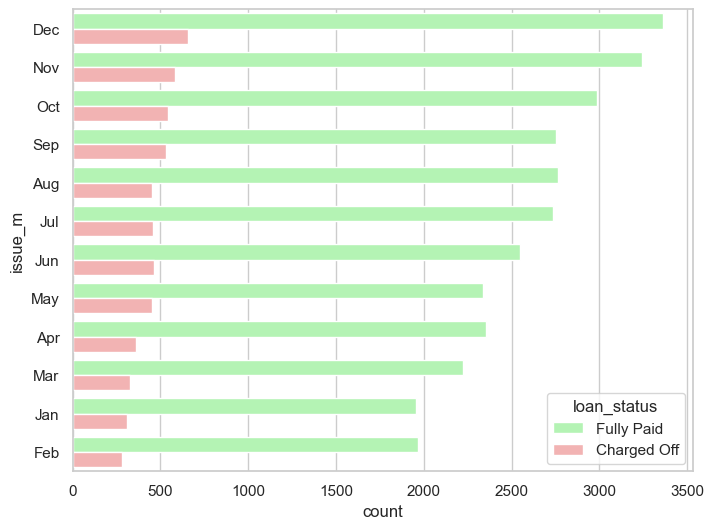

issue_m,Charged off %,Record count
Dec,0.163225,4019
May,0.162482,2788
Sep,0.162154,3287
Oct,0.154304,3532
Jun,0.153258,3008
Nov,0.151832,3820
Jul,0.142812,3193
Aug,0.140012,3214
Jan,0.137186,2267
Apr,0.132743,2712


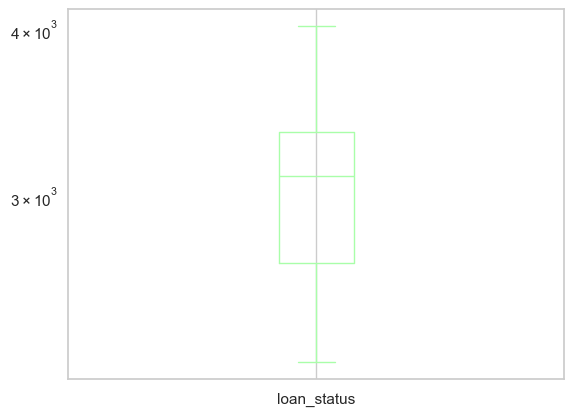

In [150]:
Univariate_Categorical(column='issue_m', box_plot=True)

we can clearly see December is the month which has the highest number of loan applications per year and also have the biggest default ratio. People might be taking loan to travel/party during year end holidays (Christmas and New Year) and then are not able to pay back. Month of May is also another one, which is during the summer break and right before the Memorial day and Independance day breaks in US where people love to travel.


# Bivariate Analysis


Now that we have analyzed each of the variables and its impact on the loan-status, let us take group of variables together and and analyze their combined effect on the loan-status. These categories are based on our business understanding. The original distribution column shows the average trend in all the data and we compare that with the data after applying our conditions.

In [154]:
def Bivariate_Analysis (*, data=df, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [155]:
def Bivariate_Categorical (*, data=df, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

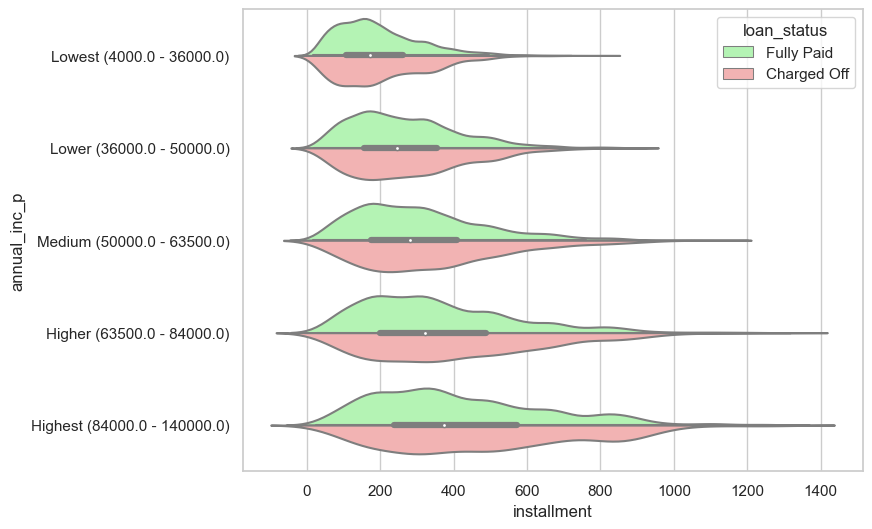

In [156]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

Above figure shows that for higher installments for any income group have more number of defaults.


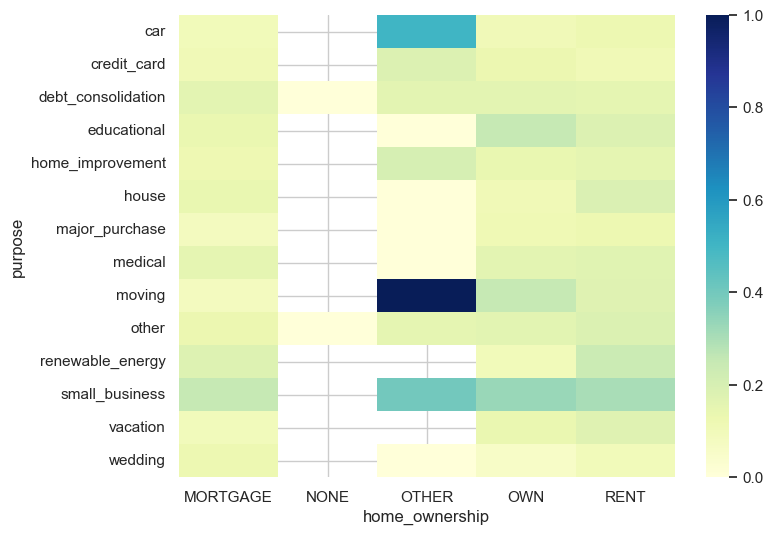

In [158]:
Bivariate_Categorical(x='home_ownership', y='purpose')

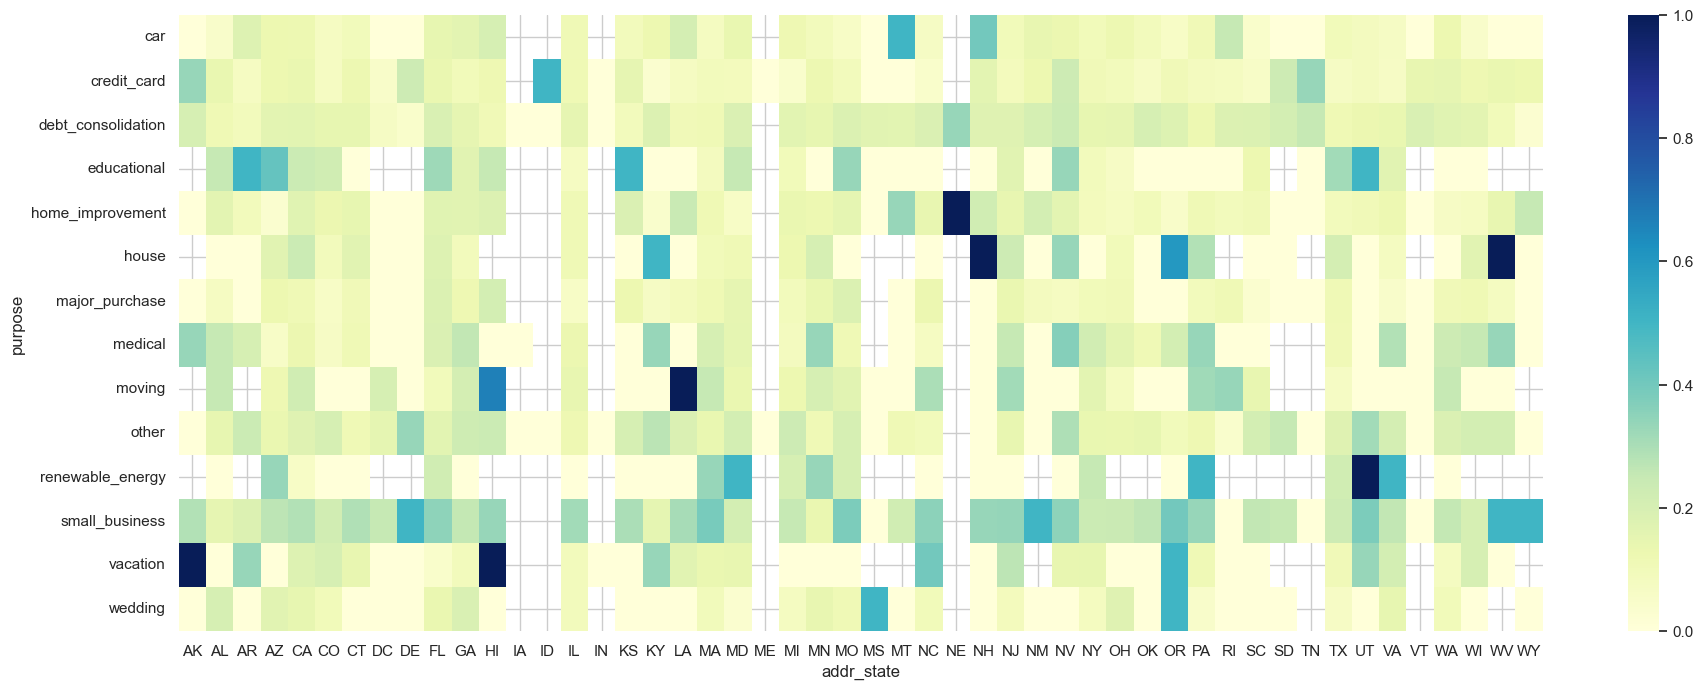

In [159]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

As per the above plot, the darker the intersection of ‘addr_state’ has with the ‘purpose’ of the loan, the risker the loan application is. 
Some of the examples are below:
Vacation loans in AK, HI, OR
House Loans in NH , WV , OR
Education loans in AR, KS, UT
Small business loans in DE, NM, WV, WY
Wedding loans in S, OR


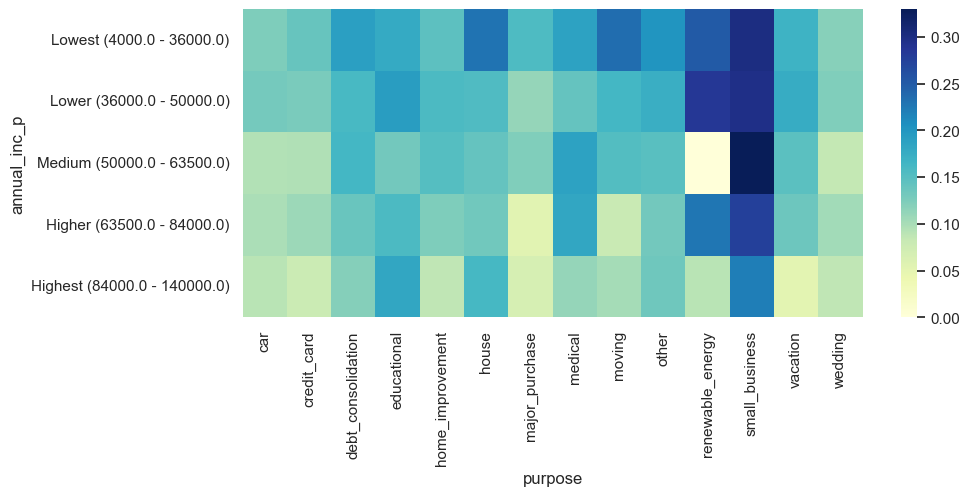

In [161]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

Insights:
Plot of various income groups versus the risky purposes of loans for them. Some examples are: •In general small business loans are riskier than other types of loans , especially for lowest and medium income groups •Small business, educational and renewable energy are the top 3 loans purposes with highest credit risk. Credit card, car and major_purchase are the top 3 with lowest credit risk.

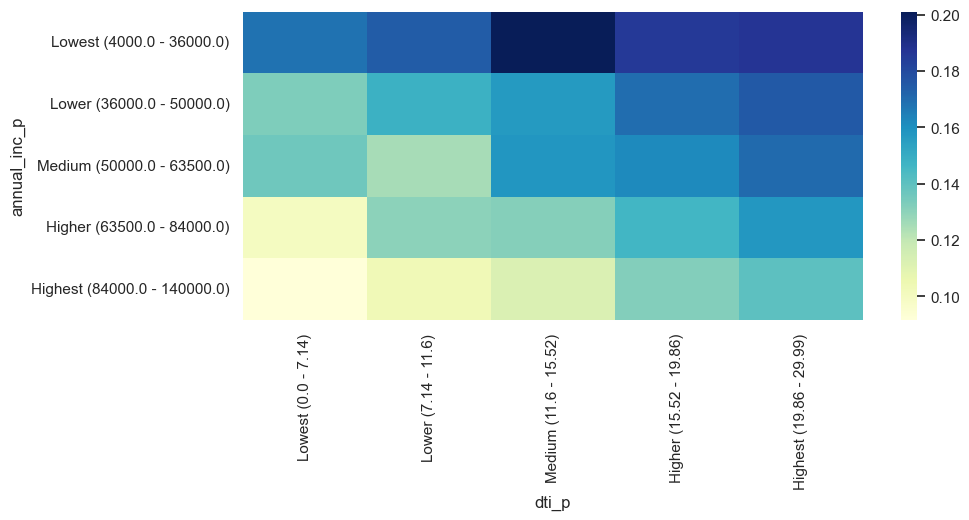

In [163]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

Medium debt-to-income group in the lowest income range is the riskiest when it comes to loan repayment.



Hereby we come to an end of the EDA of the loan data set and finding some of the drivers for loan default. Apart from the ones highlighted below, I am sure there will be multiple other factors too; however, according to me, these are the some of the most impactful ones.

<b>Minor Impact</b> <br>
.Higher loan amount (above 16K) <br>
•Higher installment amount (above 327) <br>
•Lower annual income (below 37K)<br> 
•Higher debt to income ratio (above 15%) <br>
•Applicant’s address state (NV, SD, AK, FL, etc.) <br>
•Loan issue month (May, Sep)<br>

<b>Heavy impact</b> <br>
•Higher interest rate (above 13%) <br>
•Higher revolving line utilization rate (above 58%) <br>
•Repayment term (5 years)<br> 
•Loan grade & sub-grade (D to G) <br>
•Missing employment record<br> 
•Loan purpose (small business, renewable energy, educational) <br>
•Derogatory public records (1 or 2) <br>
•Public bankruptcy records (1 or 2)<br>

<b>Combined impact</b> <br>
•High loan amount & interest rate for lower income group <br>
•High installment and longer repayment term <br>
•Home ownership (other) and loan purpose (car, moving or small business) <br>
•Residential state and loan purpose<br> 
•Income group and loan purpose<br>